In [7]:
from datetime import datetime
import pandas as pd
import acquire
import prepare
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import Holt

In [2]:
df = prepare.prep_store()
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,Tuesday,13.84
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,34.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,Tuesday,31.65
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,62.40
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,Tuesday,43.40


In [3]:
# splitting the data

In [4]:
train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]


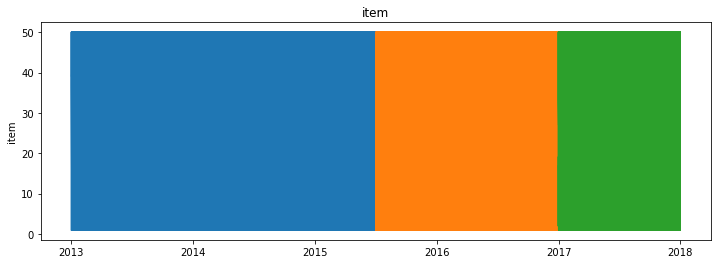

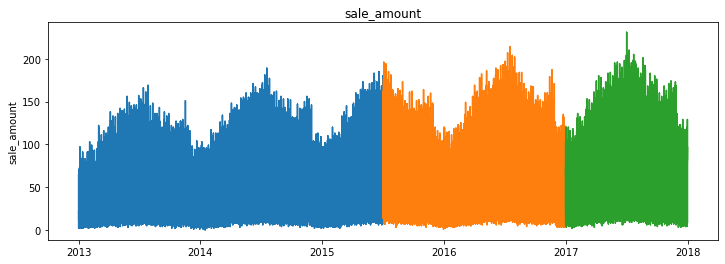

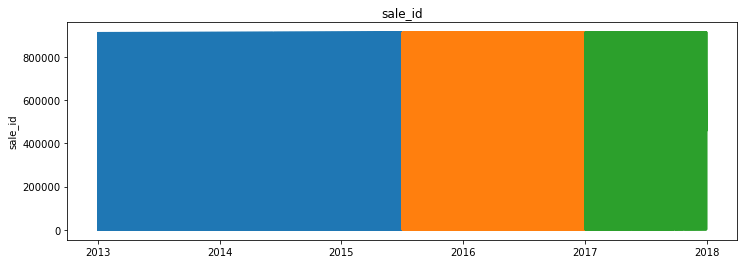

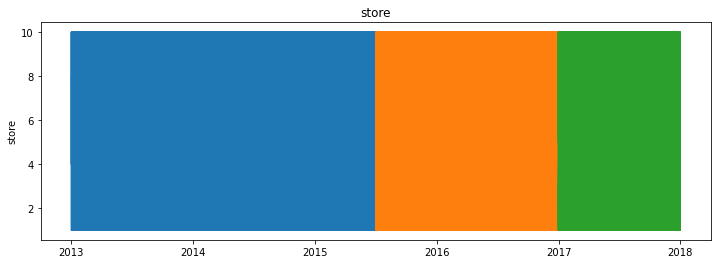

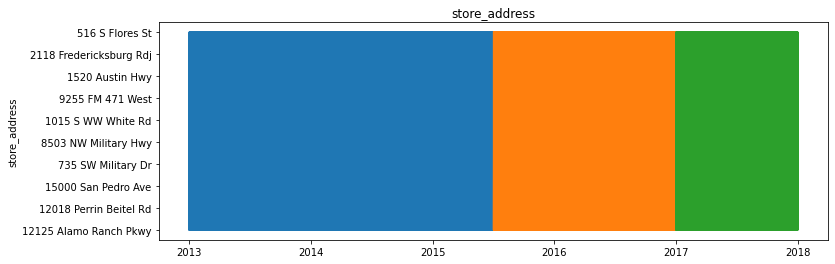

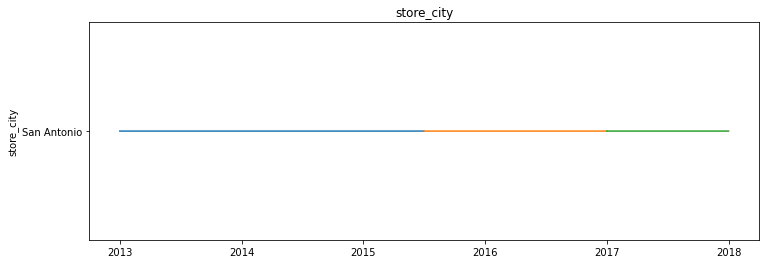

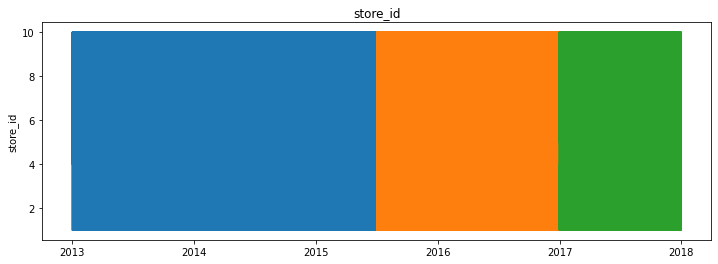

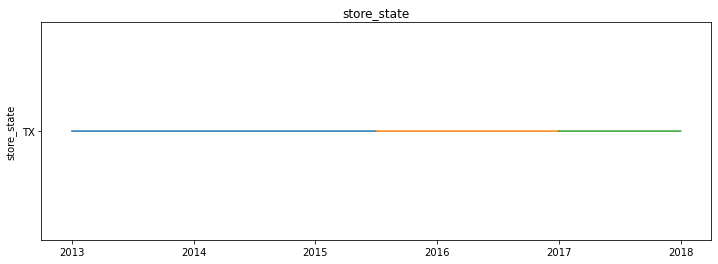

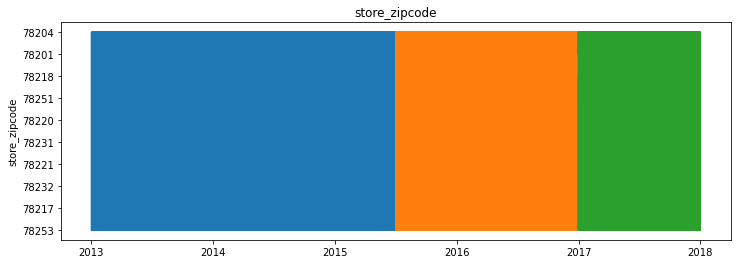

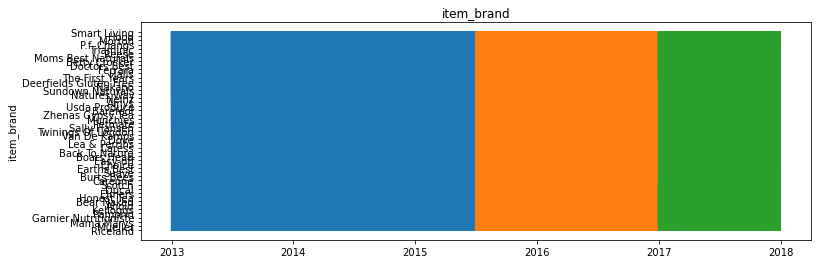

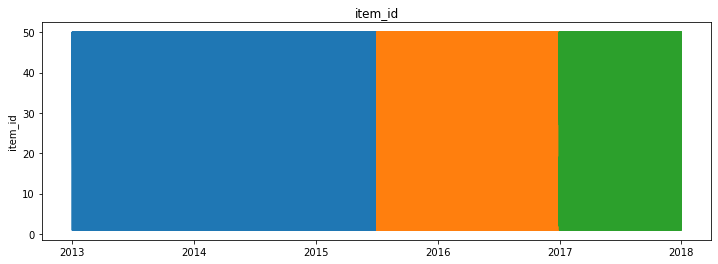

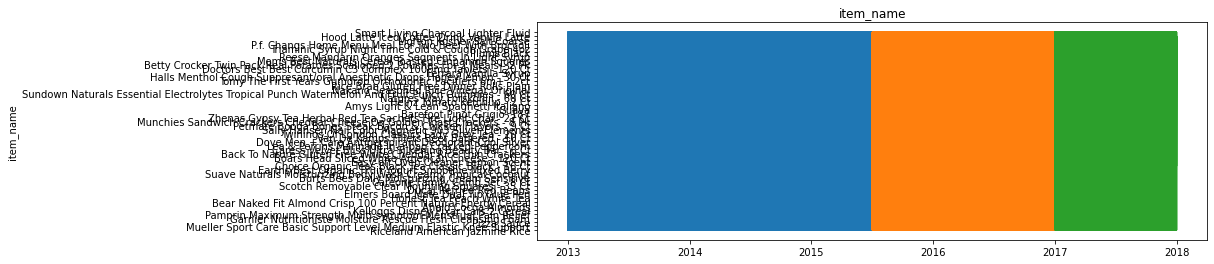

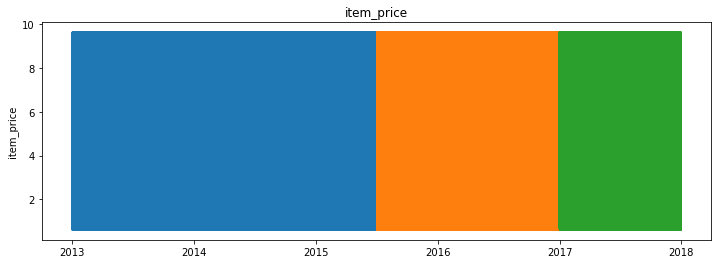

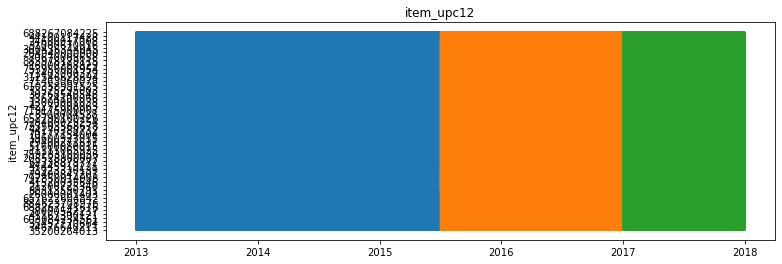

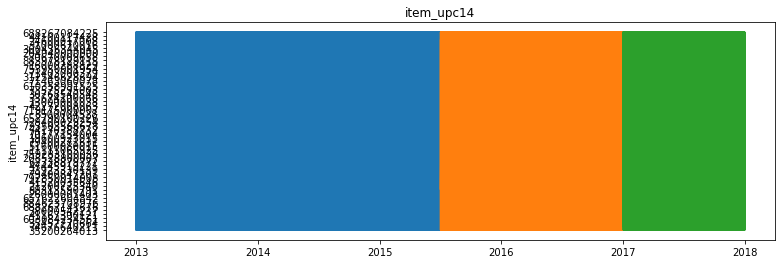

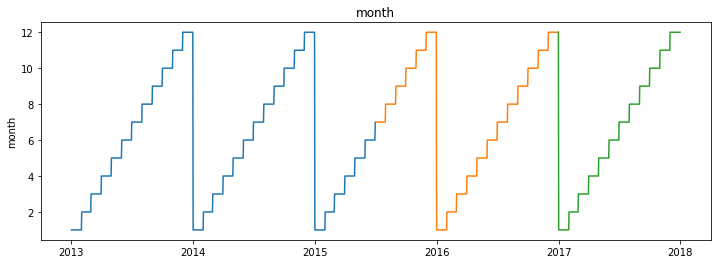

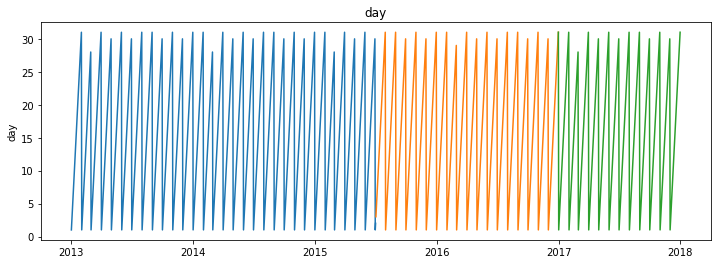

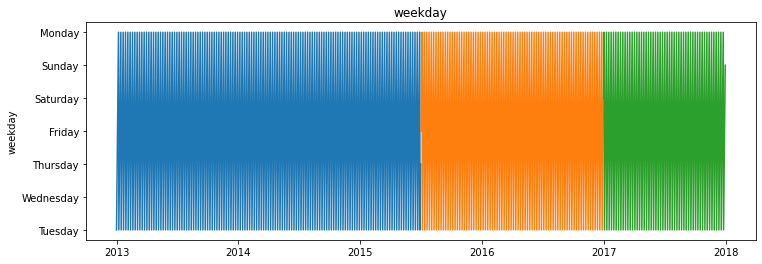

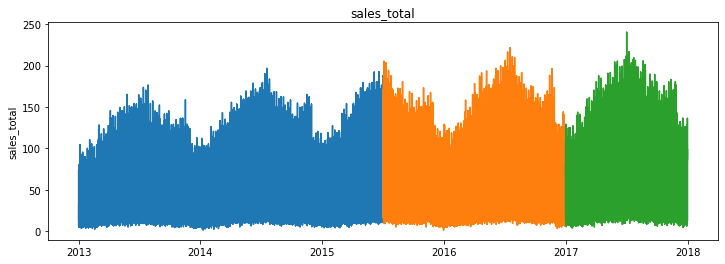

In [5]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()


In [6]:
# evaluate

In [8]:
# evaluation function to compute rmse

def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [9]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [10]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


In [11]:
sales = train['sales_total'][-1:][0]


yhat_df = pd.DataFrame({'sales_total': [sales]}, 
                       index = validate.index)

yhat_df.head(2)


,sales_total
sale_date,
2015-07-03 00:00:00+00:00,72.79
2015-07-03 00:00:00+00:00,72.79


sales_total -- RMSE: 33


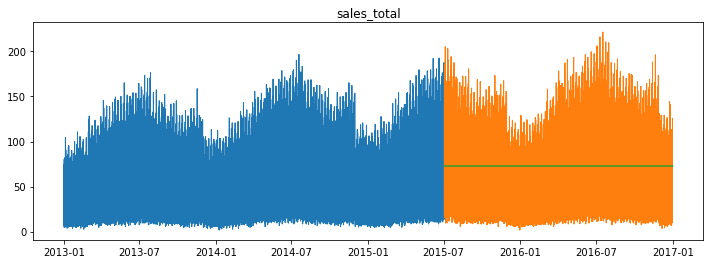

In [15]:
plot_and_eval('sales_total')


In [16]:
# evaluate with rmse and mse

In [17]:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'sales_total')


In [18]:
sales = round(train['sales_total'].mean(), 2)


def make_predictions():
    yhat_df = pd.DataFrame({'sales_total': [sales]}, index = validate.index)
    return yhat_df

yhat_df = make_predictions()

sales_total -- RMSE: 32


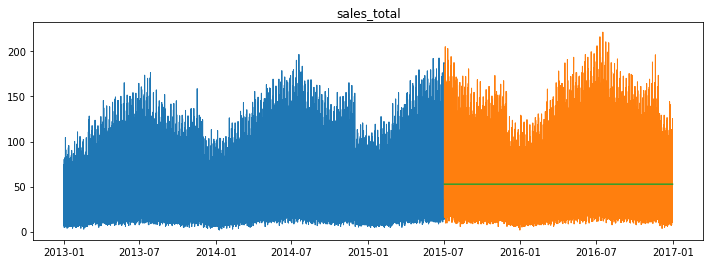

In [19]:
plot_and_eval('sales_total')